# Why we need vector database?


* One of the biggest challenges of AI applications is efficient data processing.
Many of the latest AI applications rely on vector embeddings. Chatbots, question-answering systems, and machine translation rely on vector embeddings.
vector database are a new type of database, designed to store and query unstructured data.
Unstructured data is data that doesn't have a fixed schema, such as text, images and audio
* Vector databases use a combination of different optimized algorithms that all participate in Approximate Nearest Neighbor (ANN) search.[[ref]](https://redblink.com/vector-databases/) <br>
應用場域<br>
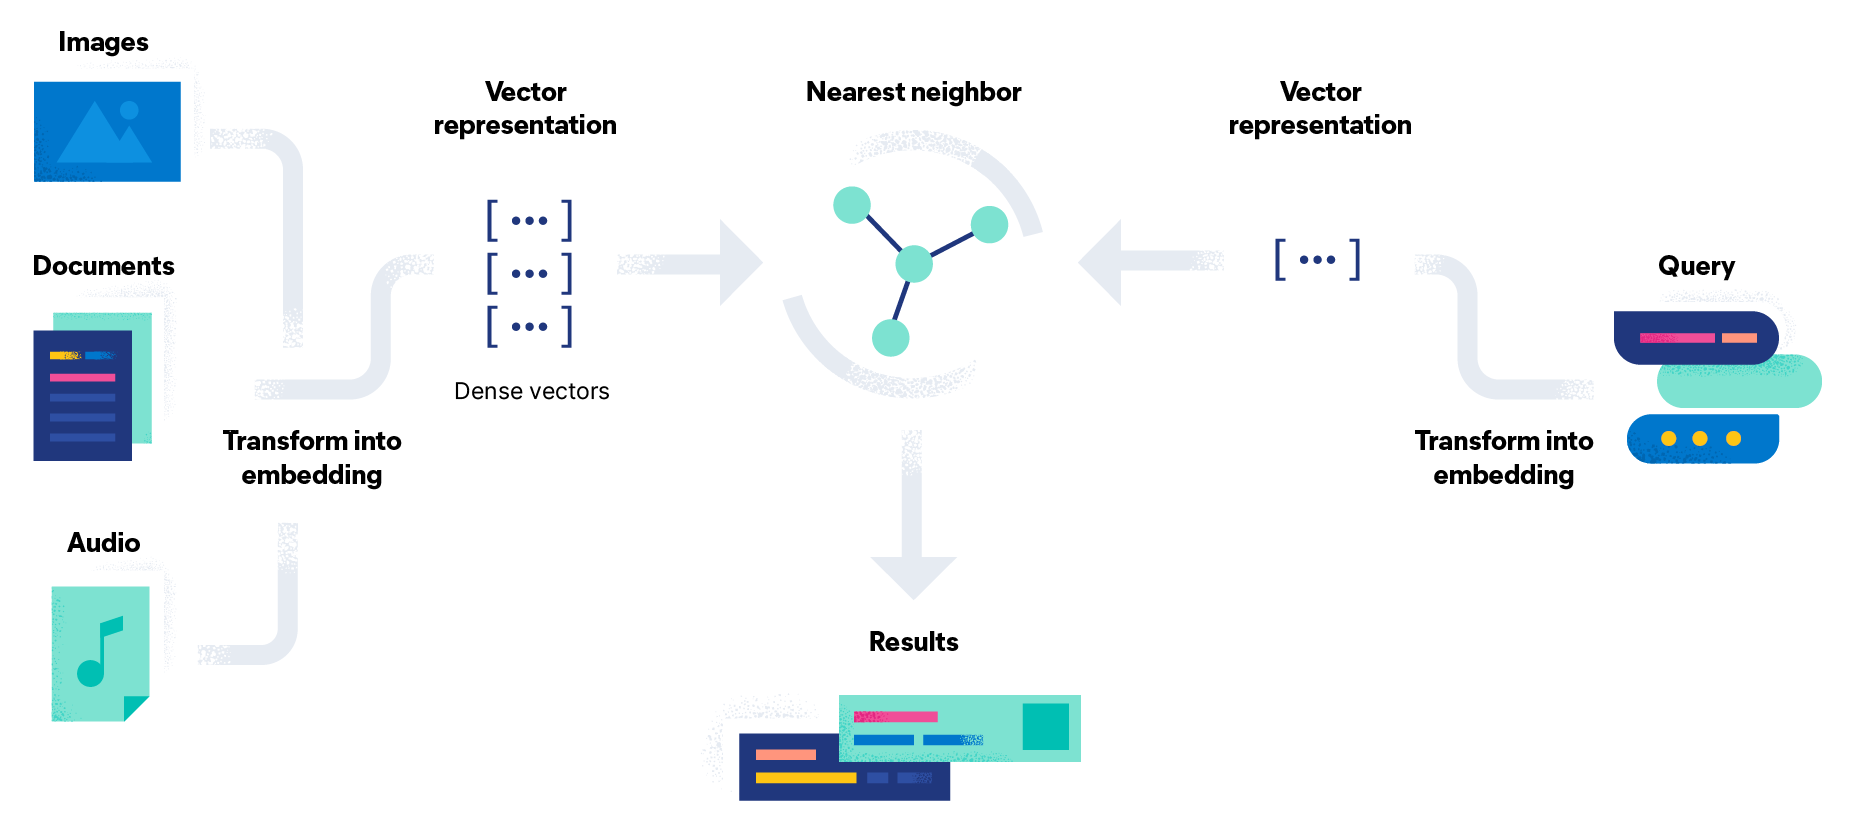



## Pinecone introduction 專為資料科學設計的向量資料庫 [參考](https://www.pinecone.io/)
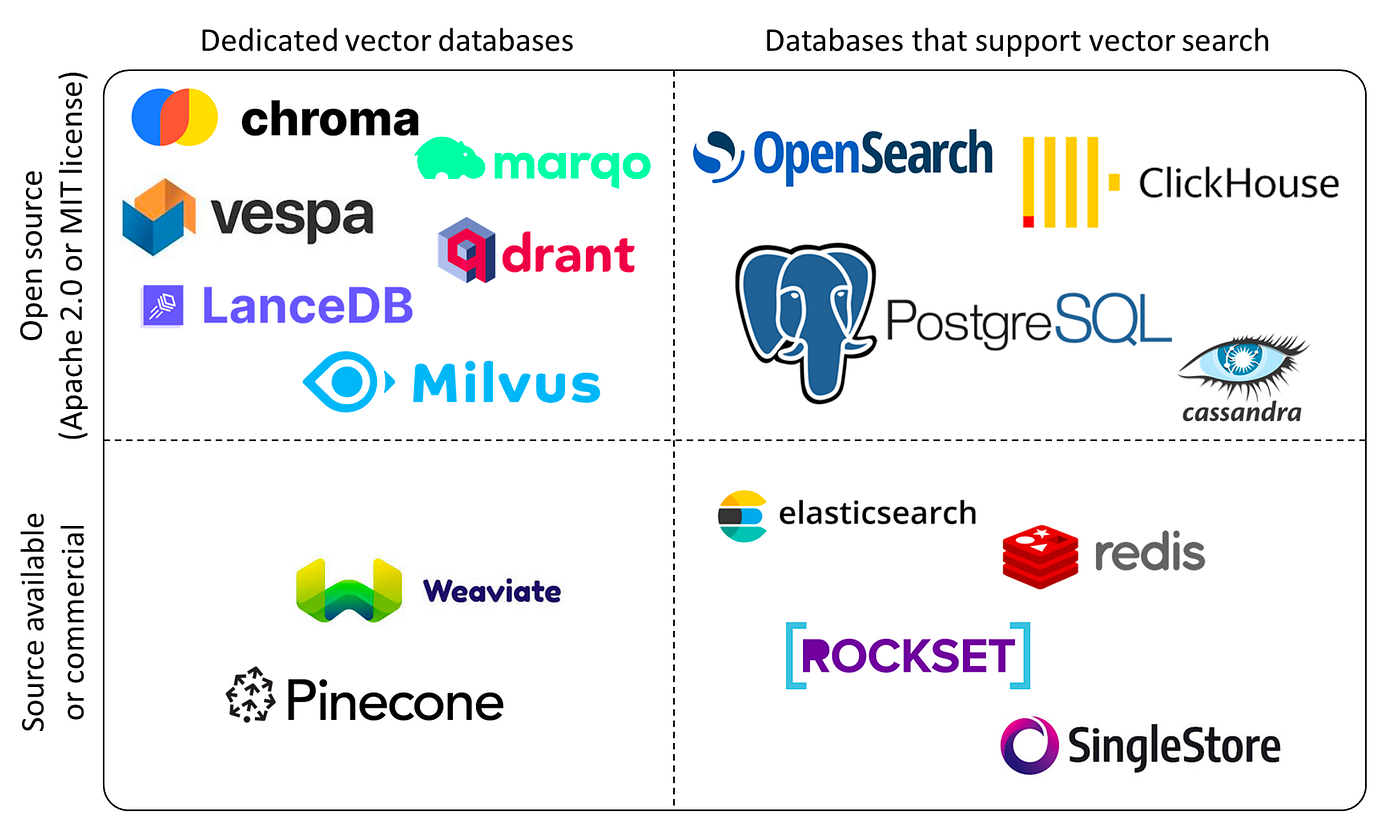


ps: This notebook uses the latest versions of the Pinecone library.

In [1]:
# pip install -q pinecone-client
# pip install --upgrade -q pinecone-client
# pip show pinecone-client

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# authenticating to Pinecone. 
# the API KEY is in .env
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)


True

In [17]:
os.environ.get("PINECONE_API_KEY")

'b1f23d56-3e71-4fdd-a46e-2bedf18c6786'

In [40]:
from pinecone import Pinecone

# Initilizing and authenticating the pinecone client
pc = Pinecone()
# pc = Pinecone(api_key='b1f23d56-3e71-4fdd-a46e-2bedf18c6786')

# checking authentication
pc.list_indexes()


{'indexes': [{'dimension': 1536,
              'host': 'langchain-37o83s8.svc.gcp-starter.pinecone.io',
              'metric': 'cosine',
              'name': 'langchain',
              'spec': {'pod': {'environment': 'gcp-starter',
                               'pod_type': 'starter',
                               'pods': 1,
                               'replicas': 1,
                               'shards': 1}},
              'status': {'ready': True, 'state': 'Ready'}}]}

## Working with Pinecone Indexes

In [34]:
# creating a Pinecone index 
# only one index permitted on the free plan (pod-based)

from pinecone import PodSpec 
index_name = 'langchain'

if index_name not in pc.list_indexes().names():
    print(f'Creating index {index_name}')
    pc.create_index(
        name=index_name,
        dimension=1536,
        metric='cosine',
        spec=PodSpec(
            environment='gcp-starter'
        )
    )
    print('Index created! 😊')
else:
    print(f'Index {index_name} already exists!')

Creating index langchain
Index created! 😊


In [39]:
# listing all indexes w/ meta data
pc.list_indexes()

{'indexes': [{'dimension': 1536,
              'host': 'langchain-37o83s8.svc.gcp-starter.pinecone.io',
              'metric': 'cosine',
              'name': 'langchain',
              'spec': {'pod': {'environment': 'gcp-starter',
                               'pod_type': 'starter',
                               'pods': 1,
                               'replicas': 1,
                               'shards': 1}},
              'status': {'ready': True, 'state': 'Ready'}}]}

In [31]:
index_name = 'langchain'
# getting a complete description of a specific index:
pc.describe_index(index_name)

{'dimension': 1536,
 'host': 'langchain-37o83s8.svc.gcp-starter.pinecone.io',
 'metric': 'cosine',
 'name': 'langchain',
 'spec': {'pod': {'environment': 'gcp-starter',
                  'pod_type': 'starter',
                  'pods': 1,
                  'replicas': 1,
                  'shards': 1}},
 'status': {'ready': True, 'state': 'Ready'}}

In [36]:
index = pc.Index(index_name)
index.describe_index_stats()

# index_fullness 代表向量填充容量，範圍從0.0到1.0。0.0意味著索引是空的，沒有任何向量被添加進去。如果這個值接近1.0，則表示索引接近其最大容量。

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [30]:
# getting a list with the index names 
pc.list_indexes().names()

['langchain']

In [32]:
# deleting an index
index_name = 'langchain'
pc.delete_index(index_name)

if index_name in pc.list_indexes().names():
    print(f'Deleting index {index_name} ... ')
    pc.delete_index(index_name)
    print('Done')
else:
    print(f'Index {index_name} does not exist!')

Index langchain does not exist!


## Working with Vectors

概念上，但不是一樣<br>
vdb 的 namespace(vector index) 比較像是 noSQL 中的 key

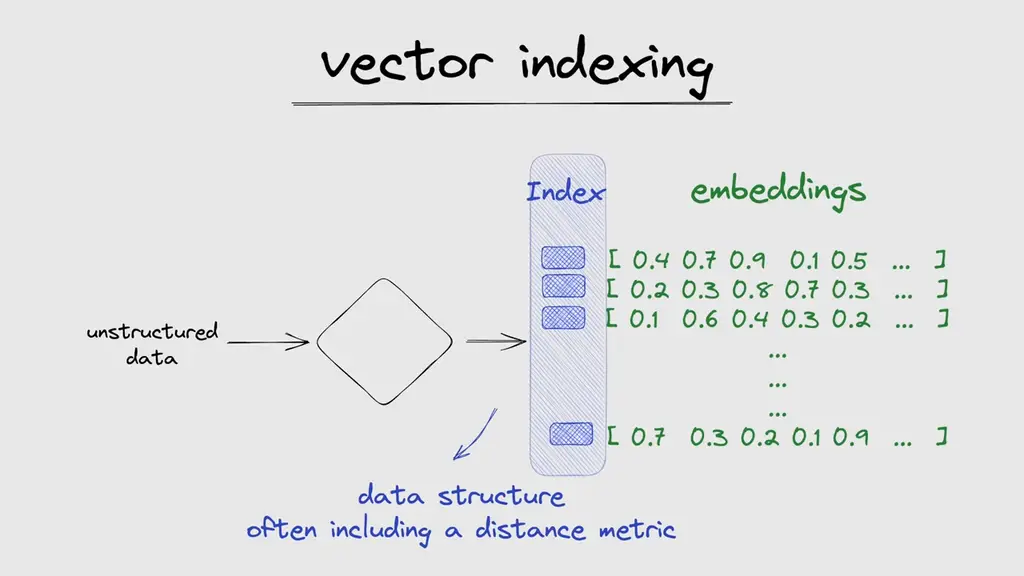

### Vector databases: Not all indexes are created equal
[參考](https://thedataquarry.com/posts/vector-db-3/)<br>
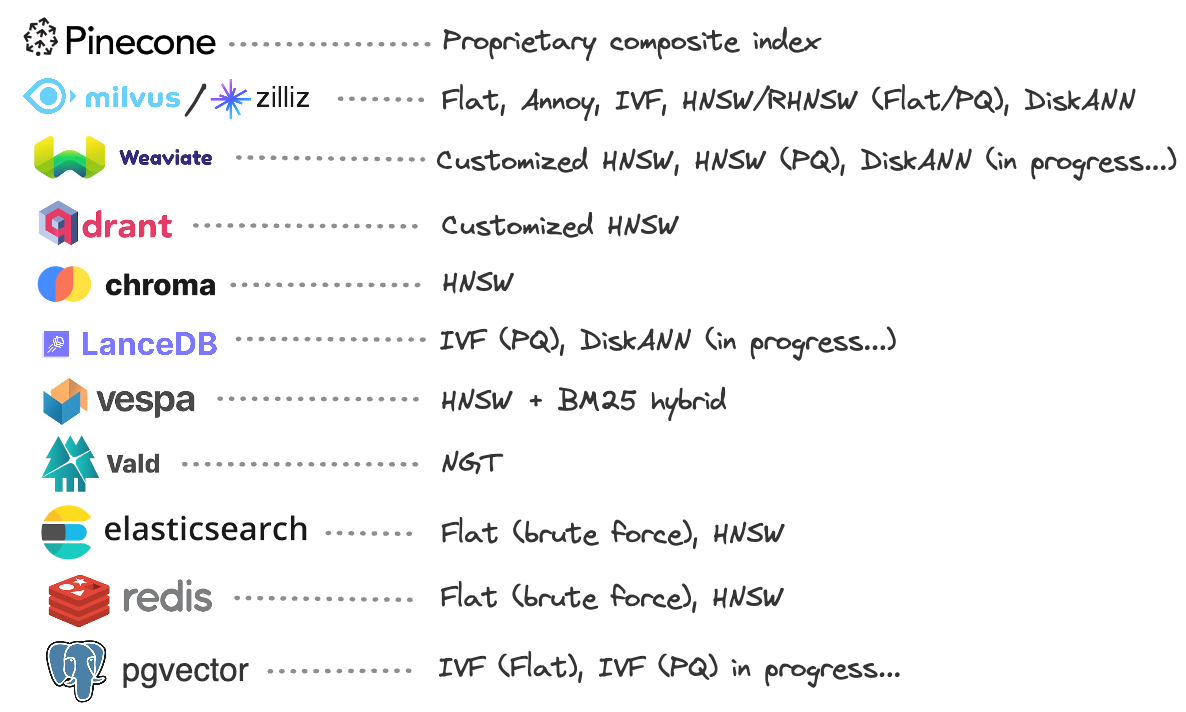

## CRUD operations

- CREATE -> upsert 
- READ -> fetch
- UPDATE -> upsert
- DELETE -> delete

### create vectors

In [37]:
# inserting vectors
import random
vectors = [[random.random() for _ in range(1536)] for v in range(5)] # 建立5個1536維度的隨機向量    
# print(vectors)
ids = list('abcde')

index_name = 'langchain'
index = pc.Index(index_name)

index.upsert(vectors=zip(ids, vectors))


{'upserted_count': 5}

### updating vectors

In [41]:
# updating vectors
index.upsert(vectors=[('c', [0.5] * 1536)])

{'upserted_count': 1}

### read vectors

In [42]:
# fetching vectors
# index = pc.Index(index_name)
index.fetch(ids=['c', 'd'])


{'namespace': '',
 'usage': {'read_units': 1},
 'vectors': {'c': {'id': 'c',
                   'values': [0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
                              0.5,
             

### delete vectors

In [31]:
# deleting vectors
index.delete(ids=['b', 'c'])

{}

In [44]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 5e-05,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

In [45]:
# querying a non-existing vector returns an empty vector
index.fetch(ids=['x']) 

{'namespace': '', 'usage': {'read_units': 1}, 'vectors': {}}

In [48]:
# querying vectors
query_vector = [random.random() for _ in range(1536)]
query_vector[:5]

[0.13648441559522617,
 0.702711990010726,
 0.816322403423333,
 0.15748220455477902,
 0.5233982629262715]

In [49]:
index.query(
    vector=query_vector,
    top_k=3,
    include_values=False
)



{'matches': [{'id': 'c', 'score': 0.865886271, 'values': []},
             {'id': 'd', 'score': 0.760812283, 'values': []},
             {'id': 'a', 'score': 0.743896306, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}

## Namespaces

In [56]:
# index.describe_index_stats()
index = pc.Index('langchain')

import random
vectors = [[random.random() for _ in range(1536)] for v in range(5)]
ids = list('abcde')
index.upsert(vectors=zip(ids, vectors))

{'upserted_count': 5}

In [58]:
# partition the index into namespaces
# creating a new namespace
vectors = [[random.random() for _ in range(1536)] for v in range(3)]
ids = list('xyz')
index.upsert(vectors=zip(ids, vectors), namespace='first-namespace')

{'upserted_count': 3}

In [59]:
vectors = [[random.random() for _ in range(1536)] for v in range(2)]
ids = list('qp')
index.upsert(vectors=zip(ids, vectors), namespace='second-namespace')

{'upserted_count': 2}

In [60]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0001,
 'namespaces': {'': {'vector_count': 5},
                'first-namespace': {'vector_count': 3},
                'second-namespace': {'vector_count': 2}},
 'total_vector_count': 10}

In [61]:
# if not assign namespace, it will can't be found in default namespace
index.fetch(ids=['x'])

{'namespace': '', 'usage': {'read_units': 1}, 'vectors': {}}

In [70]:
index.fetch(ids=['x'], namespace='first-namespace')


{'namespace': 'first-namespace',
 'usage': {'read_units': 1},
 'vectors': {'x': {'id': 'x',
                   'values': [0.998199642,
                              0.435896814,
                              0.852830291,
                              0.348576546,
                              0.209558159,
                              0.226295933,
                              0.162613392,
                              0.495672286,
                              0.0415223204,
                              0.556051254,
                              0.318698108,
                              0.520753622,
                              0.627473354,
                              0.125516191,
                              0.961644351,
                              0.90820682,
                              0.367915094,
                              0.219567254,
                              0.4092623,
                              0.169245988,
                              0.724860549,
       

In [71]:
index.delete(ids=['x'], namespace='first-namespace')

{}

In [72]:
index.delete(delete_all=True, namespace='first-namespace')

{}

In [73]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 7e-05,
 'namespaces': {'': {'vector_count': 5},
                'second-namespace': {'vector_count': 2}},
 'total_vector_count': 7}